#### ML Final Project Yanchen Dong

#### Step 1 Problem Statement

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

The gold here is to identify tumor type among 'glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor'.

#### Step 2 Assumptions/Hypotheses about data and model

To Detect and Classify Brain Tumor using, CNN and TL; as an asset of Deep Learning and to examine the tumor position(segmentation).

Tensorflow CNN-based Brain Tumor Detection will be used.

In [1]:
import numpy as np
import os
import keras
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import matplotlib.colors

import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.utils import shuffle 
from tensorflow.keras.utils import to_categorical

### Creating the CNN Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.models import Sequential, load_model
from keras import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Building Model
from keras.utils import plot_model
from tensorflow.keras import models

# Training Model
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

C:\Users\yanch\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

#### Step 3: EDA 
#### Step 4 Feature Engineering & Transformations

In [2]:
base_dir = 'C:\\Users\\yanch\\Desktop\\UC\\Classes\\2024 Spring\\ADSP 31009 Machine Learning and Predictive Analytics\\Final Project'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [3]:
from skimage.transform import resize
X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=224

for label in labels:
    path = os.path.join(train_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)

for label in labels:
    path = os.path.join(test_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
        


In [4]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=90,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

valid_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224), color_mode='rgb', shuffle=True,
                                                  subset='training', batch_size=32, class_mode='categorical')

val_generator = valid_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224), color_mode='rgb', shuffle=True,
                                                  subset='validation',batch_size=32,class_mode='categorical')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [5]:
X_train.shape

(3264, 224, 224, 3)

In [6]:
# Shuffling data
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [7]:
#After shuffling sample size remains same
X_train.shape

(3264, 224, 224, 3)

##### 3.1 Distribution of categories

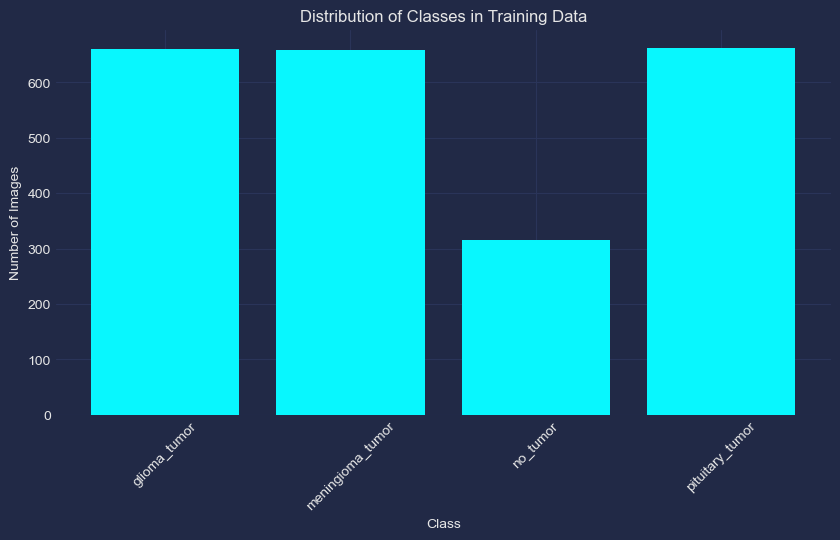

In [7]:
# This method uses the classes array, which directly indicates the class index for each image
(unique, counts) = np.unique(train_generator.classes, return_counts=True)
class_counts = dict(zip(unique, counts))

# Mapping index to class names
class_names = {v: k for k, v in train_generator.class_indices.items()}
class_counts_named = {class_names[k]: v for k, v in class_counts.items()}

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(class_counts_named.keys(), class_counts_named.values())
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.show()


##### 3.2 Pixel Intensity Distribution

Analyzing the distribution of pixel intensities can help in understanding the general characteristics of the images, like contrast and brightness, and might suggest necessary preprocessing steps like histogram equalization.

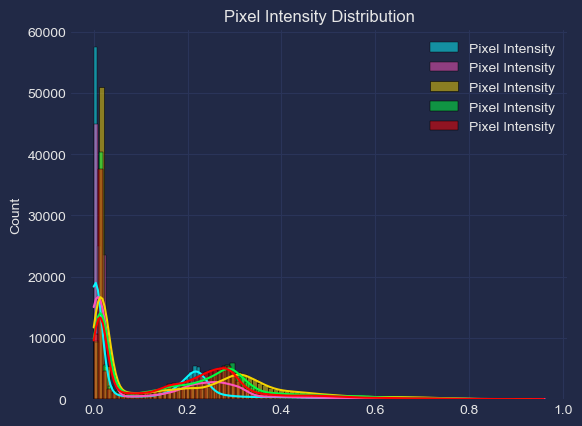

In [9]:
fig, ax = plt.subplots()
for img in X_train[:5]:  # Use the same images from the first batch
    sns.histplot(img.ravel(), label='Pixel Intensity', ax=ax, kde=True)
ax.set_title('Pixel Intensity Distribution')
ax.legend()
plt.show()


##### 3.3 Sample images after transformation

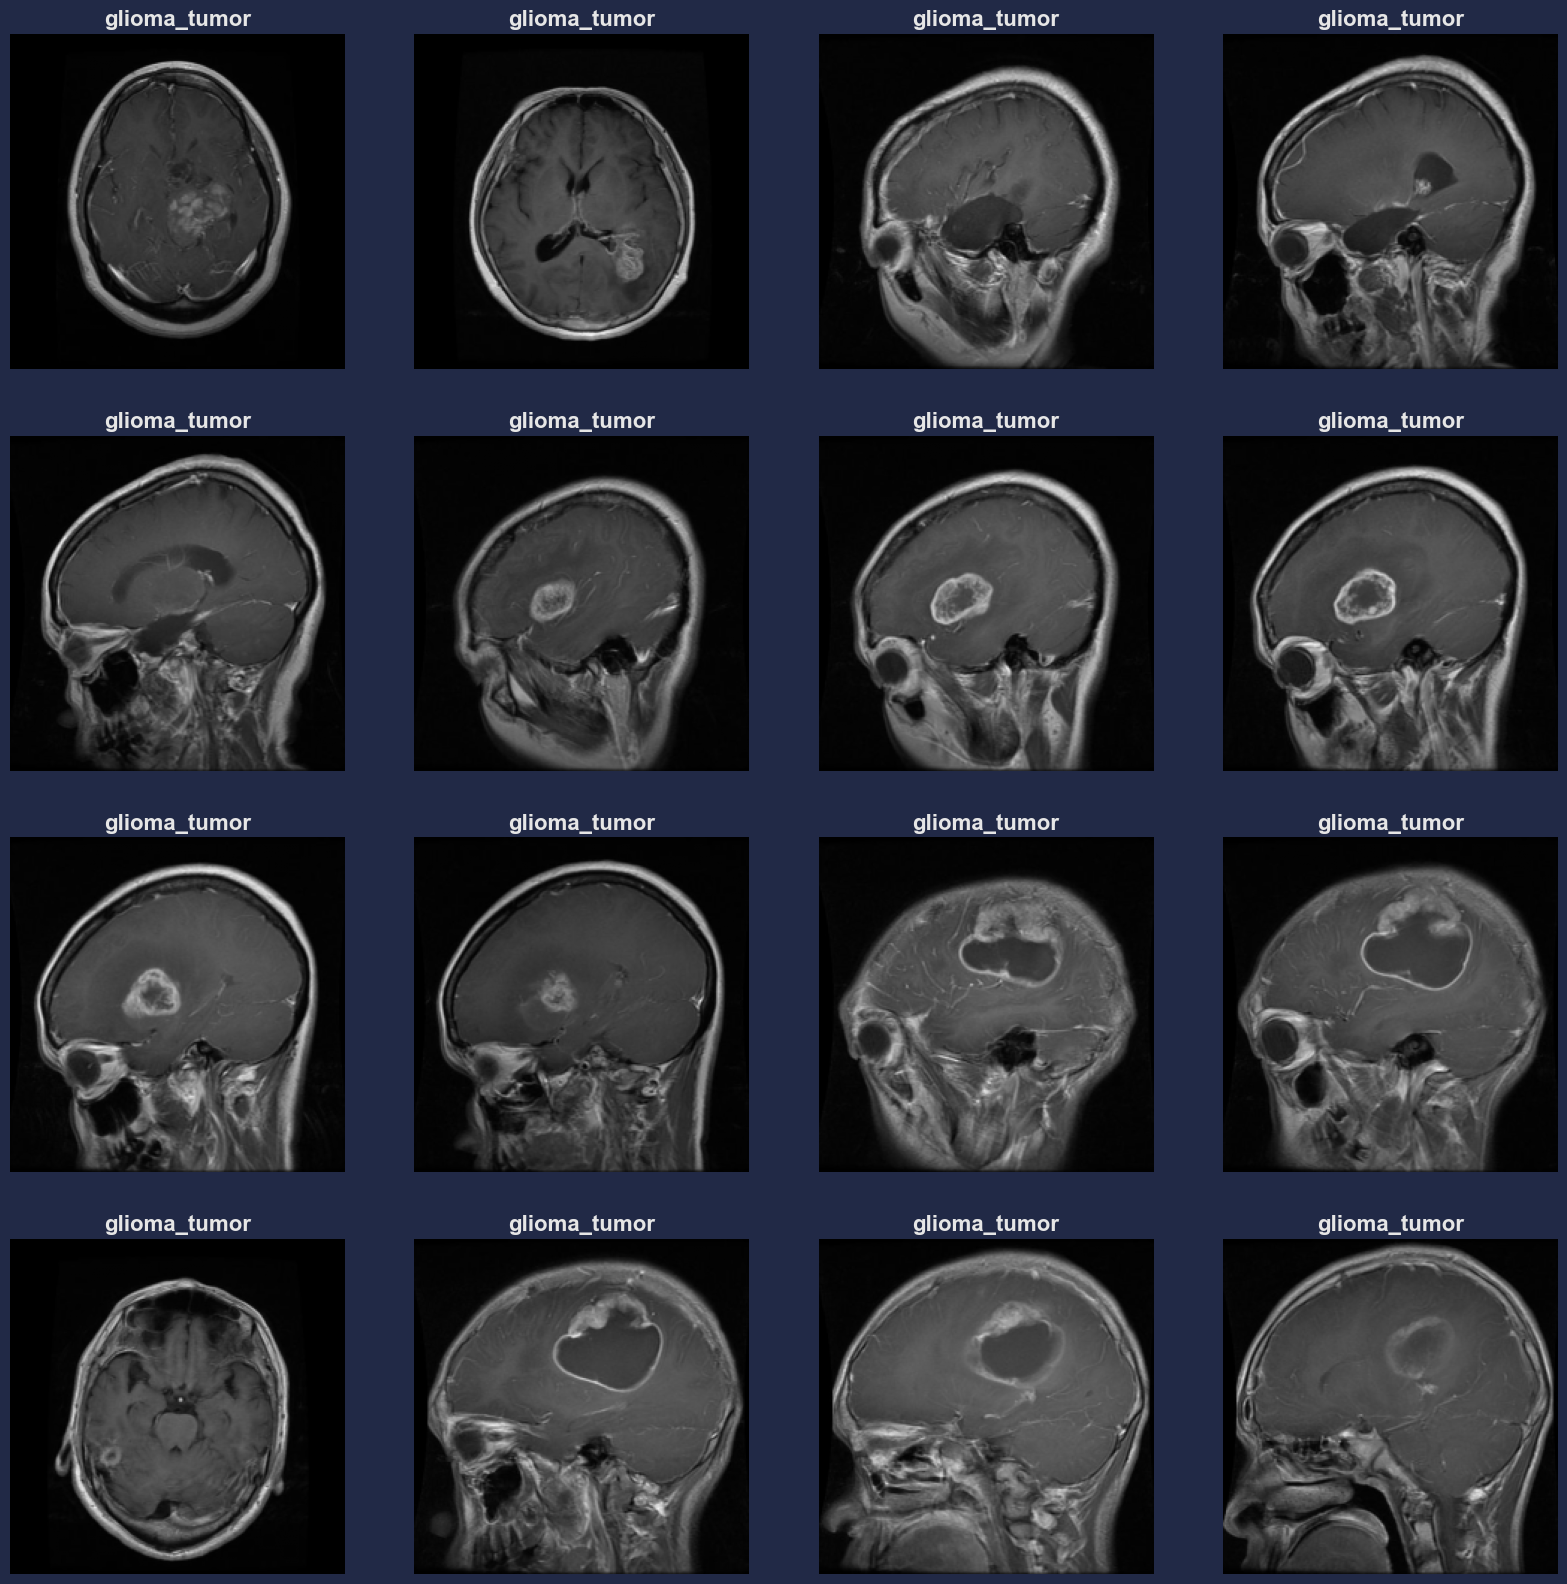

In [11]:
#plotting the images
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[Y_train[i]], fontsize=16, fontweight='bold')
    plt.axis("off")
plt.show()

In [10]:
# Split the data into training and testing and validation
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [11]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)

(2349, 224, 224, 3)
(262, 224, 224, 3)
(653, 224, 224, 3)
(2349,)
(653,)
(262,)


##### 3.4 Distribution of categories in train 

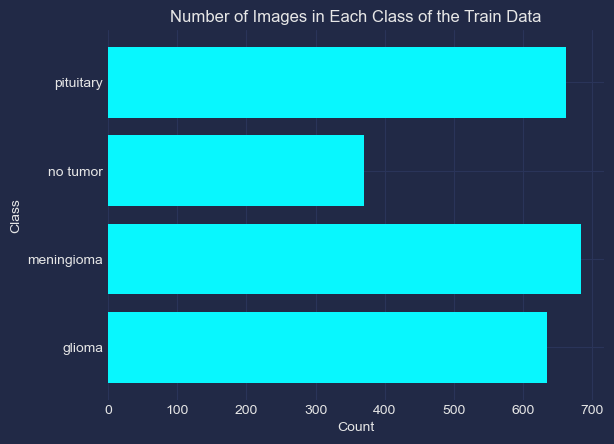

In [82]:
# Count the number of images in each class
class_counts = np.bincount(Y_train)
class_names = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Create a DataFrame with class names and counts
train_df = pd.DataFrame({'Class': class_names, 'Count': class_counts})

# Create a bar chart using matplotlib
fig, ax = plt.subplots()

# Plot the bar chart
ax.barh(train_df['Class'], train_df['Count'])

# Add title and labels
ax.set_title('Number of Images in Each Class of the Train Data')
ax.set_xlabel('Count')
ax.set_ylabel('Class')

# Display the plot
plt.show()


In [33]:
# convert string to categorical
from keras.utils import to_categorical
y_train_new = []
y_valid_new = []
y_test_new = []

for i in range(len(Y_train)):
    y_train_new.append(to_categorical(Y_train[i], num_classes=4))

for i in range(len(Y_valid)):
    y_valid_new.append(to_categorical(Y_valid[i], num_classes=4))

for i in range(len(Y_test)):
    y_test_new.append(to_categorical(Y_test[i], num_classes=4))

y_train_new = np.array(y_train_new)
y_valid_new = np.array(y_valid_new)
y_test_new = np.array(y_test_new)

In [35]:
y_train_new.shape

(2349, 4)

In [37]:
y_test_new.shape

(653, 4)

#### Step 5 Proposed Model (No Regularization)

Training Loss (Blue Line):

The training loss starts high and decreases sharply, flattening out around epoch 10.
This indicates that the model is effectively learning from the training data and minimizing the loss.

Validation Loss (Orange Line):

The validation loss also starts high, decreasing rapidly at first and then fluctuating but stabilizing after epoch 10.
The validation loss remains consistently low, indicating good generalization to the validation data despite some fluctuations.

The model shows strong overall performance with a high accuracy of 0.92 and consistently high precision, recall, and f1-scores across all classes.

Both training and validation losses decrease steadily and stabilize, indicating that the model is learning effectively and generalizing well to the validation set.

The fluctuations in validation loss suggest some variability, but the overall trend remains low.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model architecture without regularization
model = Sequential()
model.add(InputLayer(input_shape=(image_size, image_size, 3)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


C:\Users\yanch\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,740 (14.01 MB)

 Trainable params: 3,672,740 (14.01 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train_new, 
                    batch_size=64, 
                    epochs=35, 
                    steps_per_epoch=100,
                    validation_data=(X_valid, y_valid_new))

Epoch 1/35
 37/100 ━━━━━━━━━━━━━━━━━━━━ 48s 773ms/step - accuracy: 0.3965 - loss: 1.2695

C:\Users\yanch\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 299ms/step - accuracy: 0.4503 - loss: 1.1917 - val_accuracy: 0.5992 - val_loss: 0.9012
Epoch 2/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 238ms/step - accuracy: 0.6621 - loss: 0.8256 - val_accuracy: 0.7099 - val_loss: 0.6280
Epoch 3/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 243ms/step - accuracy: 0.7634 - loss: 0.6076 - val_accuracy: 0.6908 - val_loss: 0.7620
Epoch 4/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - accuracy: 0.7917 - loss: 0.5103 - val_accuracy: 0.8168 - val_loss: 0.4132
Epoch 5/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - accuracy: 0.8925 - loss: 0.2956 - val_accuracy: 0.7824 - val_loss: 0.5028
Epoch 6/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 222ms/step - accuracy: 0.9123 - loss: 0.2329 - val_accuracy: 0.8092 - val_loss: 0.4947
Epoch 7/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.9361 - loss: 0.1684 - val_accuracy: 0.8893 - val_loss: 0.4255
Epoch 8/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.9571 - loss: 0.1243 - val

In [16]:
# Save the model
# this is baseline model with rotation range = 20
model.save('cnn_model_1.keras')

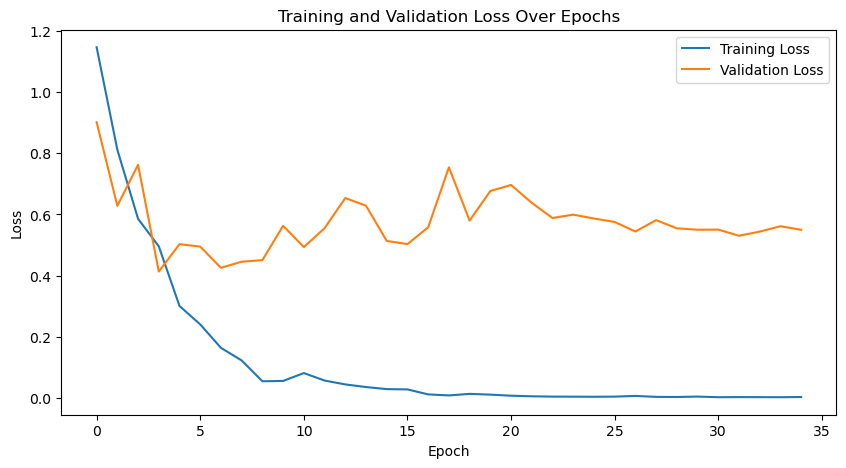

In [17]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()


In [18]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Val Accuracy = 0.9160


In [19]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
Test Accuracy = 0.9250


In [20]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       198
           1       0.89      0.91      0.90       183
           2       0.95      0.88      0.92       104
           3       0.96      0.99      0.98       168

    accuracy                           0.92       653
   macro avg       0.93      0.92      0.93       653
weighted avg       0.93      0.92      0.92       653



#### Step 6 Proposed Model with regularization

1. Input Layer:

It initializes the model to accept input images of size (image_size, image_size, 3), which corresponds to image height, image width, and 3 color channels (RGB).

2. First Convolutional Block:

Conv2D with 16 filters: Applies a 5x5 convolution kernel to extract features such as edges and textures. The use of 16 filters means it will output 16 different feature maps.

BatchNormalization: Normalizes the activations from the previous layer, which helps in accelerating the training process and stabilizing the learning by normalizing the input layer by re-centering and re-scaling.

MaxPooling2D: Reduces the spatial dimensions (height and width) of the input volume to the next layer by taking the maximum value over a 2x2 pooling window. This helps in reducing the computational cost and overfitting by providing an abstracted form of the representation.

Dropout (0.2): Randomly sets the outgoing edges of 20% of the neurons to zero during training, to prevent overfitting.

3. Subsequent Convolutional Blocks:

These blocks increase in the number of filters (32, 64, 128, 256). Increasing the number of filters allows the network to capture more complex patterns like textures and shapes.

Each block follows a similar structure: a convolution layer, batch normalization, max pooling, and dropout. This repeated structure helps the network in learning hierarchically more complex features at each level.

Kernel sizes are generally smaller (3x3) in subsequent layers, which is common as deeper layers capture higher-level abstract features where finer granularity is less important.

4. Flattening:

The output of the final convolutional layer is flattened (converted from a matrix to a vector), so it can be fed into the dense layers.

5. Dense Layers:

Dense Layer with 512 neurons: This layer is fully connected and uses ReLU activation. It serves as a classifier on the features formed by the convolutions and pooling layers.
Dropout (0.2): Again used here to reduce overfitting.

6. Output Layer:

Dense layer with 4 neurons: This implies the model is intended for a classification task with 4 classes. The softmax activation function is used to output a probability distribution over the 4 classes.

7. Compilation:

The model uses the Adam optimizer, a popular choice for deep learning tasks as it combines the best properties of the AdaGrad and RMSProp algorithms to optimize its weights.

The loss function is categorical_crossentropy, suitable for multi-class classification problems.

The metric used to evaluate the model is accuracy.

In [59]:
#simple CNN per with augment
model = Sequential()
model.add(InputLayer(input_shape=(image_size, image_size,3)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\yanch\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 220, 220, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 108, 108, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,932 (14.01 MB)

 Trainable params: 3,672,836 (14.01 MB)

 Non-trainable params: 96 (384.00 B)

##### 6.1 epochs=10, steps_per_epoch=5

The disparity between training and validation/test accuracy along with the low test scores suggests the model may be underfitting, as it does not perform well on any of the datasets.

In [38]:
history = model.fit(X_train, y_train_new, 
                    batch_size=64, 
                    epochs=10, 
                    steps_per_epoch=5,
                    validation_data=(X_valid, y_valid_new))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9389 - val_loss: 0.5294
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9313 - val_loss: 0.5413
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9803 - loss: 0.0544 - val_accuracy: 0.9351 - val_loss: 0.5765
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9889 - loss: 0.0235 - val_accuracy: 0.9389 - val_loss: 0.6128
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9902 - loss: 0.0434 - val_accuracy: 0.9389 - val_loss: 0.6036
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9746 - loss: 0.1208 - val_accuracy: 0.9351 - val_loss: 0.4841
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9867 - loss: 0.0426 - val_accuracy: 0.9275 - val_loss: 0.5177
Epoch 8/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 2s 700ms/step - accuracy: 0.9752 - loss: 0.0742

C:\Users\yanch\anaconda3\Lib\contextlib.py:155: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.9791 - loss: 0.0702 - val_accuracy: 0.9237 - val_loss: 0.4940
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9889 - loss: 0.0358 - val_accuracy: 0.9084 - val_loss: 0.5404
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9845 - loss: 0.0548 - val_accuracy: 0.9198 - val_loss: 0.5243


In [24]:
# Save the model
# this is baseline model with rotation range = 20
model.save('new_cnn_model_1.keras')

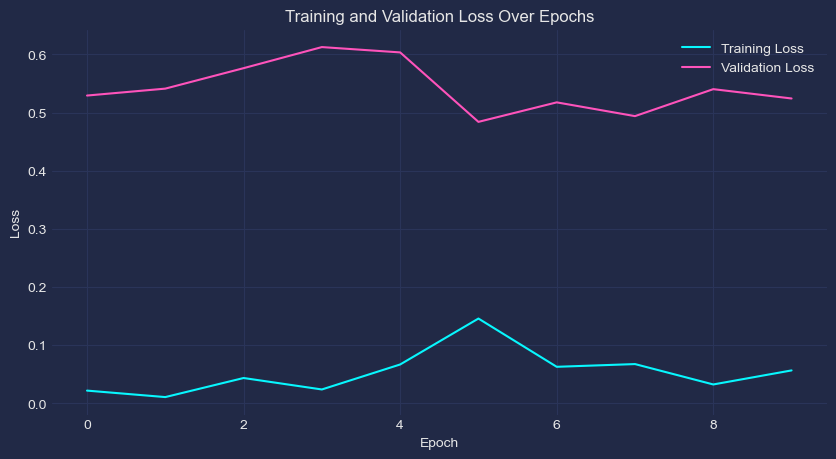

In [39]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()


In [29]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
Val Accuracy = 0.2672


In [30]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step
Test Accuracy = 0.2450


In [31]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.20      0.01      0.01       187
           2       0.17      0.80      0.29        87
           3       0.36      0.56      0.44       160

    accuracy                           0.25       653
   macro avg       0.18      0.34      0.18       653
weighted avg       0.17      0.25      0.15       653



C:\Users\yanch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\yanch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\yanch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### 6.2 epochs=50, steps_per_epoch=50

Model Performance: The model demonstrates excellent learning capability and generalizes well to unseen data. The balance between training and validation performance suggests that the model configurations, including architecture adjustments, regularization techniques, or hyperparameters, are well-tuned.

Stability and Overfitting: The relatively smooth and convergent training and validation loss curves indicate that the model is stable and not overfitting. This is corroborated by the close tracking of validation loss to training loss.

The training and validation loss curves show a desirable behavior. Training loss steadily decreases, indicating good learning progress. Validation loss decreases alongside and remains close to the training loss, which is a good sign of the model not overfitting.

In [32]:
history = model.fit(X_train, y_train_new, 
                    batch_size=64, 
                    epochs=50, 
                    steps_per_epoch=50,
                    validation_data=(X_valid, y_valid_new))

Epoch 1/50
37/50 ━━━━━━━━━━━━━━━━━━━━ 12s 981ms/step - accuracy: 0.5946 - loss: 0.9527

C:\Users\yanch\anaconda3\Lib\contextlib.py:155: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 750ms/step - accuracy: 0.6032 - loss: 0.9389 - val_accuracy: 0.4008 - val_loss: 1.2256
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 738ms/step - accuracy: 0.7068 - loss: 0.7582 - val_accuracy: 0.6145 - val_loss: 1.0696
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 730ms/step - accuracy: 0.7281 - loss: 0.6811 - val_accuracy: 0.5496 - val_loss: 1.0466
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 731ms/step - accuracy: 0.7868 - loss: 0.5578 - val_accuracy: 0.6374 - val_loss: 0.9908
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 743ms/step - accuracy: 0.8076 - loss: 0.4926 - val_accuracy: 0.6718 - val_loss: 0.8159
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 738ms/step - accuracy: 0.8473 - loss: 0.4301 - val_accuracy: 0.6908 - val_loss: 0.8416
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 732ms/step - accuracy: 0.8699 - loss: 0.3598 - val_accuracy: 0.7443 - val_loss: 0.6991
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 487s 10s/step - accuracy: 0.8710 - loss: 0.3516 - val_accuracy: 0.7595

In [33]:
# Save the model
# this is baseline model with rotation range = 20
model.save('new_cnn_model_2.keras')

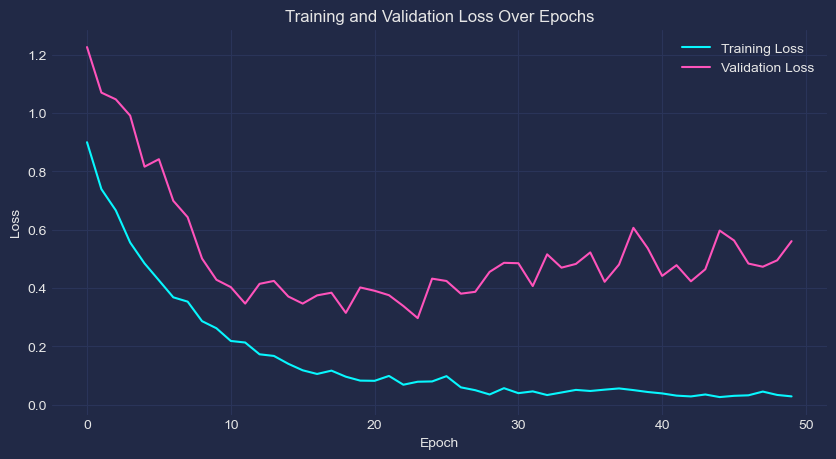

In [34]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()


In [35]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
Val Accuracy = 0.9427


In [36]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
Test Accuracy = 0.9173


In [37]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       219
           1       0.95      0.82      0.88       187
           2       0.92      0.92      0.92        87
           3       0.94      0.99      0.96       160

    accuracy                           0.92       653
   macro avg       0.92      0.92      0.92       653
weighted avg       0.92      0.92      0.92       653



##### 6.3 epochs=50, steps_per_epoch=100

Loss Stability Concerns: Despite excellent performance metrics, the variability in the validation loss could still be a concern. It may suggest that the model could start overfitting if trained for more epochs without adjustments.

In [40]:
history = model.fit(X_train, y_train_new, 
                    batch_size=64, 
                    epochs=50, 
                    steps_per_epoch=100,
                    validation_data=(X_valid, y_valid_new))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 394ms/step - accuracy: 0.9861 - loss: 0.0356 - val_accuracy: 0.9313 - val_loss: 0.5516
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 515ms/step - accuracy: 0.9854 - loss: 0.0395 - val_accuracy: 0.9427 - val_loss: 0.4838
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 479ms/step - accuracy: 0.9863 - loss: 0.0466 - val_accuracy: 0.9389 - val_loss: 0.5167
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 481ms/step - accuracy: 0.9904 - loss: 0.0240 - val_accuracy: 0.9504 - val_loss: 0.4565
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 469ms/step - accuracy: 0.9896 - loss: 0.0271 - val_accuracy: 0.9351 - val_loss: 0.5200
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 515ms/step - accuracy: 0.9911 - loss: 0.0332 - val_accuracy: 0.9427 - val_loss: 0.4462
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 427ms/step - accuracy: 0.9931 - loss: 0.0218 - val_accuracy: 0.9427 - val_loss: 0.4205
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.9918 - loss: 0

In [41]:
# Save the model
model.save('new_cnn_model_3.keras')

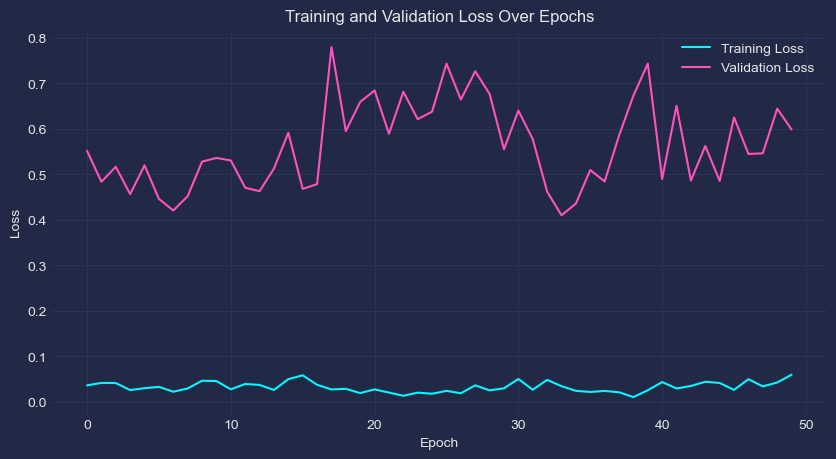

In [42]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()


In [43]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step 
Val Accuracy = 0.9237


In [44]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
Test Accuracy = 0.9449


In [45]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       219
           1       0.95      0.93      0.94       187
           2       0.88      0.94      0.91        87
           3       0.95      1.00      0.97       160

    accuracy                           0.94       653
   macro avg       0.94      0.95      0.94       653
weighted avg       0.95      0.94      0.94       653



##### 6.4 epoch = 35, steps_per_epoch=100

In [60]:
history = model.fit(X_train, y_train_new, 
                    batch_size=64, 
                    epochs=35, 
                    steps_per_epoch=100,
                    validation_data=(X_valid, y_valid_new))

Epoch 1/35
 37/100 ━━━━━━━━━━━━━━━━━━━━ 1:02 991ms/step - accuracy: 0.3305 - loss: 4.8506

C:\Users\yanch\anaconda3\Lib\contextlib.py:155: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 375ms/step - accuracy: 0.3932 - loss: 3.3018 - val_accuracy: 0.4466 - val_loss: 1.3470
Epoch 2/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.5852 - loss: 0.9946 - val_accuracy: 0.3130 - val_loss: 1.3530
Epoch 3/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.6493 - loss: 0.8459 - val_accuracy: 0.3053 - val_loss: 1.4348
Epoch 4/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 369ms/step - accuracy: 0.6894 - loss: 0.7776 - val_accuracy: 0.3244 - val_loss: 1.5073
Epoch 5/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 373ms/step - accuracy: 0.7075 - loss: 0.7224 - val_accuracy: 0.3550 - val_loss: 1.4179
Epoch 6/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - accuracy: 0.7537 - loss: 0.6409 - val_accuracy: 0.3588 - val_loss: 1.4829
Epoch 7/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 368ms/step - accuracy: 0.7665 - loss: 0.5970 - val_accuracy: 0.4504 - val_loss: 1.2290
Epoch 8/35
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 374ms/step - accuracy: 0.8033 - loss: 0.5161 - val

In [61]:
# Save the model
model.save('new_cnn_model_6.keras')

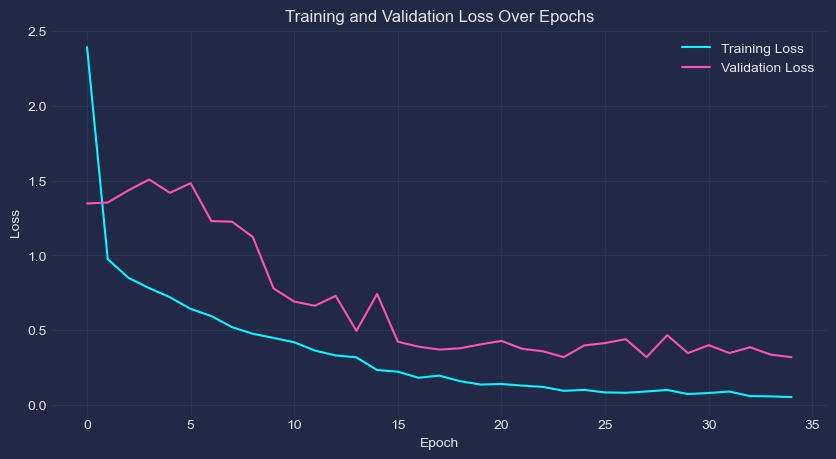

In [62]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()


In [63]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
Val Accuracy = 0.9237


In [64]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step
Test Accuracy = 0.9280


In [65]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       219
           1       0.95      0.86      0.90       187
           2       0.87      0.94      0.91        87
           3       0.98      1.00      0.99       160

    accuracy                           0.93       653
   macro avg       0.92      0.93      0.93       653
weighted avg       0.93      0.93      0.93       653



##### 6.5 epochs=100, steps_per_epoch=37 (early stopped at 46)

1. Model Performance Overview

Validation Accuracy: The model achieves a validation accuracy of 92.75%.


Test Accuracy: The test accuracy is even higher at 90.96%.

Precision and Recall: All classes show strong precision (85-96%) and recall (80-100%). This indicates that the model is not only correctly identifying positive cases but is also precise in its predictions, minimizing false positives.

F1-Score: High F1-scores across all classes (89-97%) suggest a balanced performance between precision and recall, which is crucial for reliable classification.

2. Training and Validation Curves

Accuracy Curve: The training accuracy plateaus close to 100%, while the validation accuracy stabilizes at a high level but with some gap compared to the training, indicating a slight overfitting but still within an acceptable range.
Loss Curve: Training loss decreases sharply and flattens, which is ideal. However, the validation loss, despite decreasing, shows more fluctuations, which is typical but should be monitored to ensure it doesn't start to diverge from the training loss significantly.


3. Callbacks and Adjustments

I've implemented useful callbacks like EarlyStopping and ReduceLROnPlateau, which are beneficial for handling overfitting and optimizing the training process:

EarlyStopping is configured to monitor the training loss, stopping the training if there are no improvements beyond a minimal delta, indicating that continuing training is inefficient.

ReduceLROnPlateau reduces the learning rate when the validation loss stops improving, helping the model to fine-tune adjustments in weights and potentially escape local minima.

The EarlyStopping and ReduceLROnPlateau are both callbacks in Keras that serve as training interventions to improve the training process and prevent overfitting. Each of these has specific roles and is used to monitor different aspects of the model during training. Let’s delve into the goals and functionalities of each:

EarlyStopping
Goal: To halt the training process early if there is no significant improvement in a specified metric over a defined number of epochs. This is particularly useful in avoiding overfitting and unnecessarily long training times.

ReduceLROnPlateau
Goal: To reduce the learning rate when a metric has stopped improving. This helps the model to fine-tune and potentially escape local minima during training. Lowering the learning rate can allow the model to make smaller changes to the weights and potentially discover better minima.



In [23]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=12, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=6, verbose=True)

history = model.fit(X_train, y_train_new, batch_size=64, epochs=100, validation_data=(X_valid, y_valid_new),
                   callbacks=[model_es, model_rlr])

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3408 - loss: 4.1512 - val_accuracy: 0.1641 - val_loss: 1.3980 - learning_rate: 0.0010
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6022 - loss: 0.9985 - val_accuracy: 0.3397 - val_loss: 1.3390 - learning_rate: 0.0010
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6243 - loss: 0.8712 - val_accuracy: 0.3588 - val_loss: 1.3417 - learning_rate: 0.0010
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6738 - loss: 0.7678 - val_accuracy: 0.3626 - val_loss: 1.5721 - learning_rate: 0.0010
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7683 - loss: 0.5974 - val_accuracy: 0.3588 - val_loss: 1.3576 - learning_rate: 0.0010
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7721 - loss: 0.5671 - val_accuracy: 0.4924 - val_loss: 1.1619 - learning_rate: 0.0010
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8083 - loss: 0.4945 - val_acc

In [24]:
# Save the model
# this is baseline model with rotation range = 20
model.save('new_cnn_model1.keras')

In [25]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
Val Accuracy = 0.9275


In [27]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
Test Accuracy = 0.9096


In [28]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       198
           1       0.91      0.80      0.85       183
           2       0.96      0.90      0.93       104
           3       0.95      1.00      0.97       168

    accuracy                           0.91       653
   macro avg       0.92      0.91      0.91       653
weighted avg       0.91      0.91      0.91       653



Analysis:

High Specificity in Some Classes: The model is highly specific in recognizing pituitary tumors and generally good at identifying glioma tumors.

Challenges with Meningioma: There seems to be some confusion between meningioma and glioma tumors, which might require further investigation. Feature similarities between these types could be causing the model to struggle in differentiating them accurately.

Potential for Serious Misclassification: The misclassification between tumorous and non-tumorous scans, although low, is a critical error and should be minimized as much as possible.

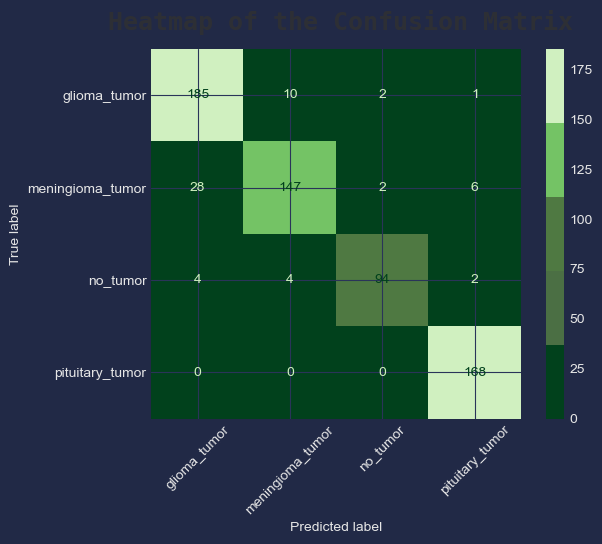

In [29]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Define the custom color map
custom_colors = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
custom_cmap = matplotlib.colors.ListedColormap(custom_colors)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)

# Create a display object with the custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(cmap=custom_cmap, ax=ax)

# Set the title and axis labels
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.10,alpha=0.8)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Save the figure
plt.savefig('CM CNN-2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

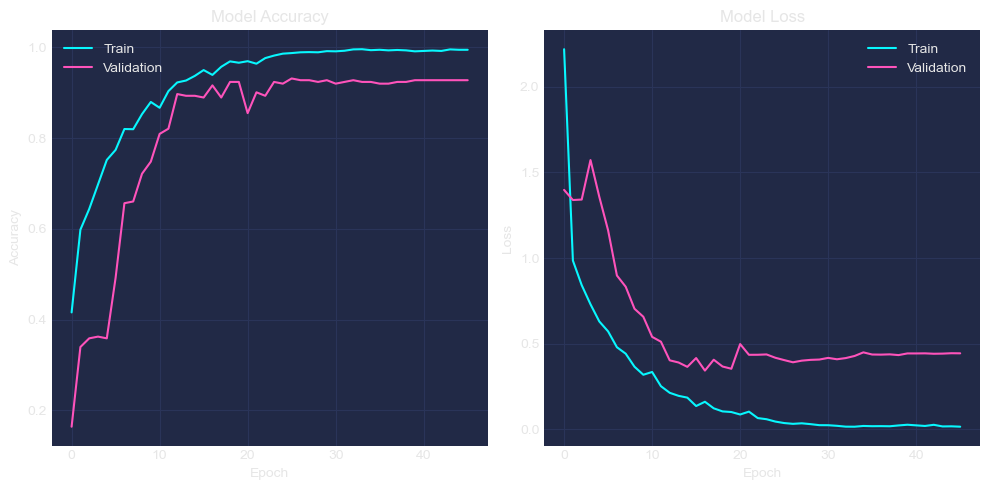

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

# Plot training and validation accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper right')

# Save the figure
plt.savefig('plot CNN-2.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step


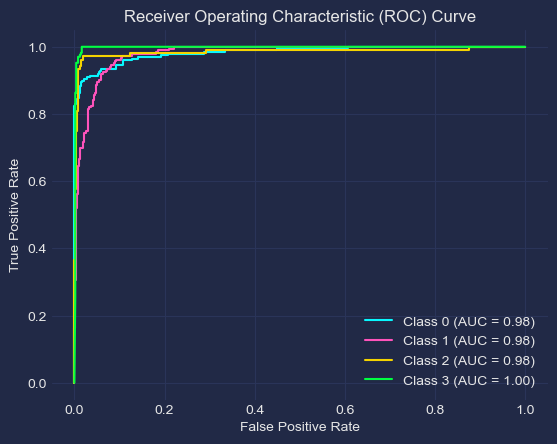

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Compute predicted probabilities for each class
y_probs = model.predict(X_test)

# Ensure that the target labels Y_test are in a 2-dimensional format
if len(Y_test.shape) == 1:
    Y_test = np.eye(len(np.unique(Y_test)))[Y_test.astype(int)]

# Compute the ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(Y_test[:, i], y_probs[:, i])

# Plot the ROC curve for each class
plt.figure()
for i in range(Y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Set the title and axis labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Save the figure
plt.savefig('ROC CNN-2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

 ##### Wrong prediction example

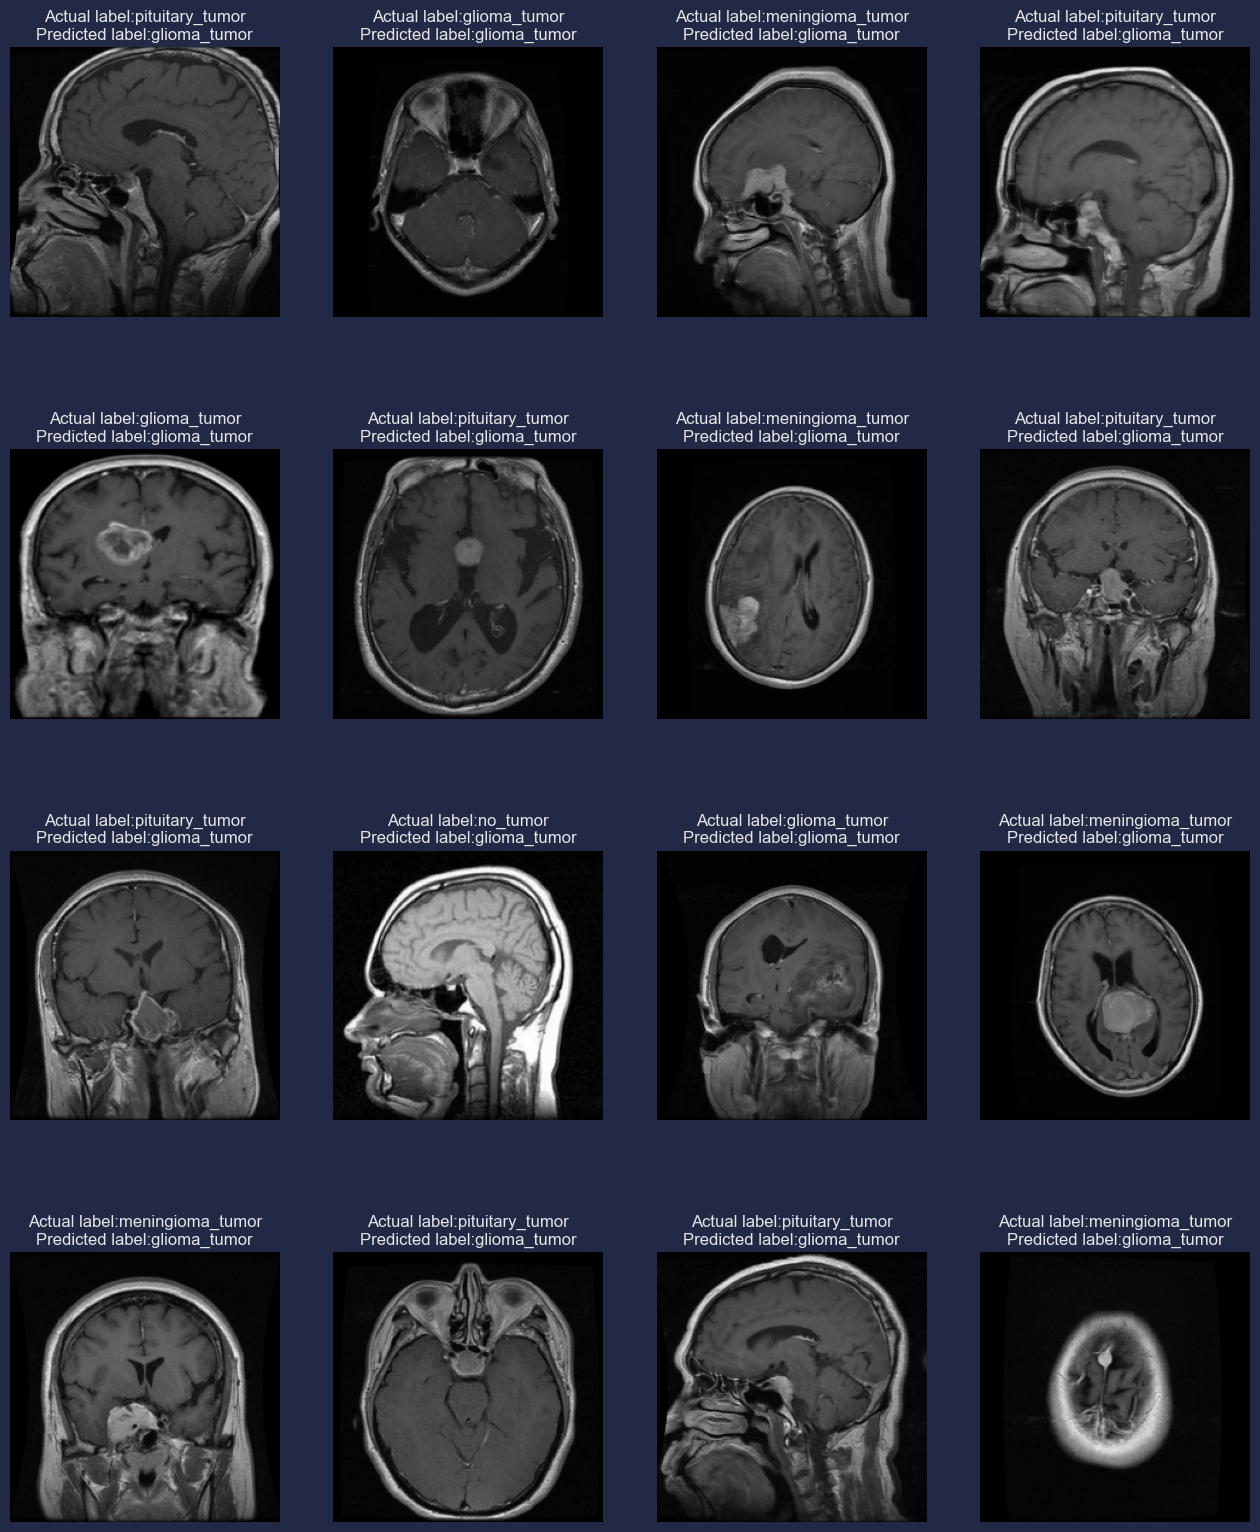

In [32]:
class_labels=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i])
    actual_label_idx = np.argmax(Y_test[i])  # Assuming Y_test is one-hot encoded
    predicted_label_idx = np.argmax(y_pred[i])  # Assuming y_pred is one-hot encoded
    plt.title(f"Actual label:{class_labels[actual_label_idx]}\nPredicted label:{class_labels[predicted_label_idx]}")
    plt.axis("off")

### Step 7 TL with EfficientNetB0

##### 7.1 Model 1


In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

num_classes = len(labels)

# Define EfficientNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,707,495 (17.96 MB)

 Trainable params: 4,665,472 (17.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [26]:
# Train the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=val_generator,
                    steps_per_epoch=len(X_train) // 64,
                    validation_steps=len(X_valid) // 64)


Epoch 1/50


C:\Users\yanch\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.6149 - loss: 0.8603 - val_accuracy: 0.1016 - val_loss: 8.2727
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.8646 - loss: 0.3835 - val_accuracy: 0.1484 - val_loss: 3.3987
Epoch 3/50


C:\Users\yanch\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1797 - val_loss: 3.4343
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9037 - loss: 0.2730 - val_accuracy: 0.1562 - val_loss: 3.9329
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.8994 - loss: 0.2943 - val_accuracy: 0.1967 - val_loss: 5.9635
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1328 - val_loss: 6.3310
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.8992 - loss: 0.2623 - val_accuracy: 0.1641 - val_loss: 6.7574
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.9431 - loss: 0.1577 - val_accuracy: 0.1797 - val_loss: 2.4378
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1484 - val_loss: 2.4938
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9173 - loss: 0.2078 - val_accuracy

In [45]:
# Evaluate the model
test_generator = valid_datagen.flow(X_test, y_test_new, batch_size=64)
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test) // 64)
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.1679 - loss: 1.3863
Test Accuracy: 0.16249999403953552


The training and validation loss plots, as well as the training and validation accuracy plots, show that there might be issues with overfitting and instability during training.

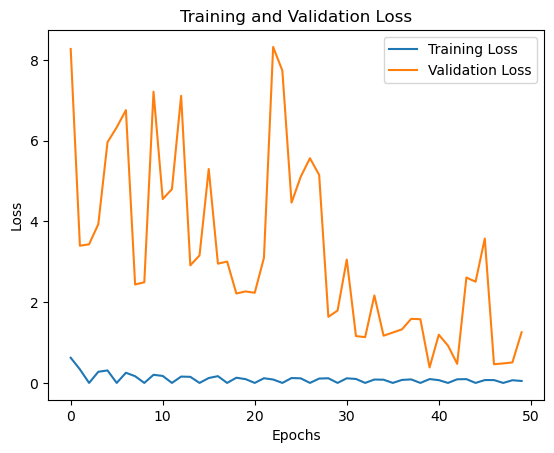

In [41]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



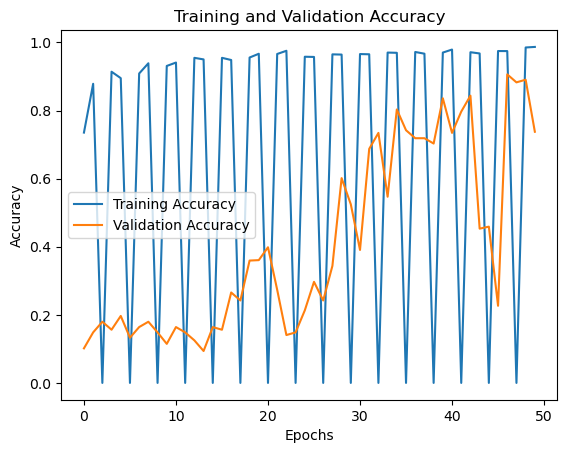

In [42]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### 7.2 Model 2 adjusted for overfitting

In [46]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(x)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,740 (14.01 MB)

 Trainable params: 3,672,740 (14.01 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [48]:
# Train the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=val_generator,
                    steps_per_epoch=len(X_train) // 64,
                    validation_steps=len(X_valid) // 64,
                    callbacks=[reduce_lr, early_stopping])


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 970ms/step - accuracy: 0.2520 - loss: 1.3695 - val_accuracy: 0.3281 - val_loss: 1.3465 - learning_rate: 1.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 790ms/step - accuracy: 0.3925 - loss: 1.2717 - val_accuracy: 0.4609 - val_loss: 1.1761 - learning_rate: 1.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3828 - val_loss: 1.2153 - learning_rate: 1.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 914ms/step - accuracy: 0.4603 - loss: 1.1935 - val_accuracy: 0.4609 - val_loss: 1.2367 - learning_rate: 1.0000e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 766ms/step - accuracy: 0.5027 - loss: 1.1517 - val_accuracy: 0.4754 - val_loss: 1.1391 - learning_rate: 1.0000e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4375 - val_loss: 1.1860 - learning_rate: 1.0000e-04
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 917m

In [50]:

# Evaluate the model
test_generator = valid_datagen.flow(X_test, y_test_new, batch_size=64)
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test) // 64)
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.2872 - loss: 2.4204
Test Accuracy: 0.3031249940395355


The training and validation loss and accuracy plots indicate that the model is facing significant instability during training.

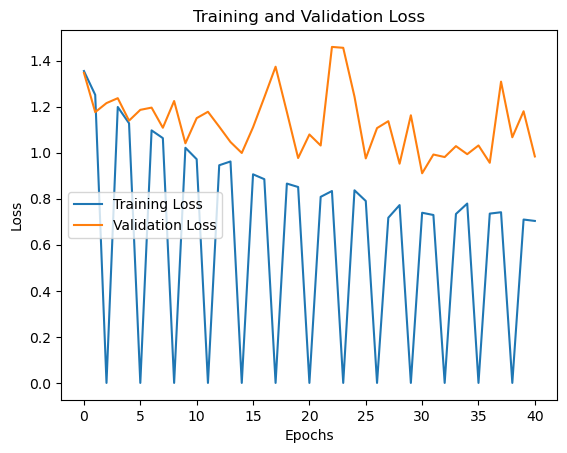

In [51]:

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


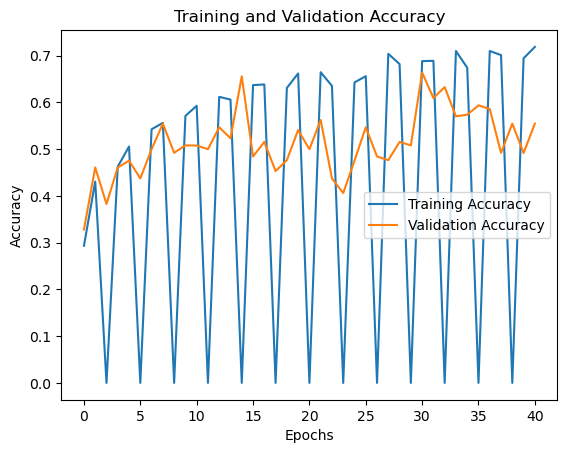

In [52]:

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Step 8 Conclusion


CNN Architecture 2 Run 3 has the highest accuracy

In [22]:
import pandas as pd

# Define data for Architecture 1
data2 = {
    'Steps per Epoch': [5, 50, 100, 100, 37],
    'Epochs': [10, 50, 50, 35, 100],
    'Accuracy': [0.245, 0.9173, 0.9449, 0.928, 0.9096],
    'Notes': ['', '', '', '', 'early stopped at epoch = 46']
}

# Define data for Architecture 2
data1 = {
    'Steps per Epoch': [100],
    'Epochs': [35],
    'Accuracy': [0.925],
    'Notes': ['']
}

# Create DataFrames
df1 = pd.DataFrame(data1, index=[f"Architecture 1 - Run {i+1}" for i in range(len(data1['Steps per Epoch']))])
df2 = pd.DataFrame(data2, index=[f"Architecture 2 (L2 Regularization) - Run {i+1}" for i in range(len(data2['Steps per Epoch']))])

# Concatenate both DataFrames
df = pd.concat([df1, df2])

df


,Steps per Epoch,Epochs,Accuracy,Notes
Architecture 1 - Run 1,100,35,0.9250,
Architecture 2 (L2 Regularization) - Run 1,5,10,0.2450,
Architecture 2 (L2 Regularization) - Run 2,50,50,0.9173,
Architecture 2 (L2 Regularization) - Run 3,100,50,0.9449,
Architecture 2 (L2 Regularization) - Run 4,100,35,0.9280,
Architecture 2 (L2 Regularization) - Run 5,37,100,0.9096,early stopped at epoch = 46


Model Performance Analysis

Training and Validation Loss: The plot shows that while the training loss has consistently decreased and flattened (indicating good learning), the validation loss has some fluctuations but generally follows the training loss closely without diverging too much. This suggests that the model is not overfitting significantly.

1. Accuracy Metrics:

Validation Accuracy: Peaked at approximately 95.04% during training, which is quite high.
Test Accuracy: Even higher at 94.49%. This consistency between validation and test accuracy is a good sign of the model's ability to generalize well.

2. Classification Report:

Precision and Recall: Very high across all classes, with Class 3 achieving perfect recall (1.00). This indicates that the model is very effective in identifying true positives for Class 3 without any false negatives.

F1-Score: Also high across all classes, suggesting a good balance between precision and recall. The weighted averages for accuracy, precision, recall, and F1-score are all above 0.94, which is excellent.

Observations

1. Model Stability: The model demonstrates stable performance across metrics, which is indicative of robust learning capabilities.

2. Loss Fluctuations: The fluctuations in validation loss could be indicative of potential minor overfitting or could simply be a result of the model navigating through complex loss landscapes. However, as they do not diverge significantly, this is not a major concern currently.

#### Step 9 Future Work 

##### Address Class Imbalance:

Augmentation for Underrepresented Classes: Increase the number of augmented images for the underrepresented class (no_tumor) to balance the dataset.

Class Weights: Utilize class weights in the model training process to give more importance to underrepresented classes during the loss calculation.

Oversampling/Undersampling: Consider oversampling the minority class or undersampling the majority classes.

##### Enhance Data Augmentation:

The current augmentation strategy is robust, but we can experiment with less aggressive transformations for brain images, where orientation and structure are important. For example, a high rotation range might not be appropriate as brain tumors and their structures could be highly orientation-specific.

##### Modify the Network Architecture:

Depth and Complexity: As you're dealing with complex medical images, consider gradually increasing the complexity of the CNN. Incorporate deeper layers or additional convolutional blocks to capture more complex features.

Advanced Architectures: Explore more sophisticated architectures like ResNet, Inception, or DenseNet, which might be more effective for medical image analysis due to their deeper and more complex structures.

##### Continuous Monitoring and Feedback Loop:

Once deployed, continuously monitor the model’s performance and establish a feedback loop with medical professionals to collect insights and further improve the model.

##### Clinical Validation:

Before full deployment, ensure that the model undergoes thorough clinical validation to meet regulatory standards and to confirm that it performs well across different demographics and equipment variations.